In [1]:
import warnings
warnings.filterwarnings("ignore")
import hdbscan

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}


from pylab import rcParams

rcParams['figure.figsize'] = 14,6

%matplotlib inline

In [2]:
df = pd.read_csv('BaynesSoundMooring_5mbss_ConductivityTemperatureDepth_20200117T030000Z_20200119T235959Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity',df.columns[15]: 'Temperature'},inplace=True)
X = df[['Conductivity','Temperature']].values

In [8]:
from sklearn.model_selection import RandomizedSearchCV
import hdbscan
from sklearn.metrics import make_scorer

SEED = 42
np.random.seed(SEED)  # set the random seed as best we can

hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(X)

# specify parameters and distributions to sample from
param_dist = {'min_samples': [20,40,60,80,100,120,140,160,180,200],
              'min_cluster_size':[50,100,150,200,250,300,350], 
              'cluster_selection_epsilon': [0.1,0.001,0.0001,0.00001],
              'cluster_selection_method' : ['eom','leaf'],
              'metric' : ['euclidean','manhattan'] 
             }

#validity_scroer = "hdbscan__hdbscan___HDBSCAN__validity_index"
validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)


n_iter_search = 20
random_search = RandomizedSearchCV(hdb
                                   ,param_distributions=param_dist
                                   ,n_iter=n_iter_search
                                   ,scoring=validity_scorer 
                                   ,random_state=SEED)

random_search.fit(X)


print(f"Best Parameters {random_search.best_params_}")
print(f"DBCV score :{random_search.best_estimator_.relative_validity_}")

Best Parameters {'min_samples': 80, 'min_cluster_size': 200, 'metric': 'manhattan', 'cluster_selection_method': 'leaf', 'cluster_selection_epsilon': 0.1}
DBCV score :0.33449549433424774


In [9]:
import hdbscan


clust  = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,gen_min_span_tree=False, 
                         min_samples= 80, min_cluster_size= 200, cluster_selection_epsilon= 0.1,
                         metric='euclidean', cluster_selection_method= 'eom', p=None).fit(X)

labels = clust.labels_
clustered = (labels >= 0)

cnts = pd.DataFrame(labels)[0].value_counts()
cnts = cnts.reset_index()
cnts.columns = ['cluster','count']
print(cnts.sort_values(['cluster']))

   cluster  count
5       -1     83
1        0  63528
4        1   6488
0        2  77146
3        3  40046
2        4  58113


In [3]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 

In [4]:
import hdbscan


clust  = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,gen_min_span_tree=False, 
                         min_samples= 80, min_cluster_size= 200, cluster_selection_epsilon= 0.1,
                         metric='euclidean', cluster_selection_method= 'eom', p=None).fit(X_principal)

labels = clust.labels_
clustered = (labels >= 0)

cnts = pd.DataFrame(labels)[0].value_counts()
cnts = cnts.reset_index()
cnts.columns = ['cluster','count']
print(cnts.sort_values(['cluster']))

   cluster   count
0        0  147182
1        1   98222


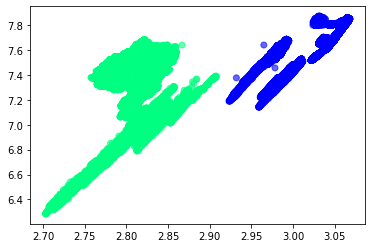

In [5]:
# Visualizing the clustering 
plt.scatter(X[:,0], X[:,1],  
           c = labels, cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 